В задачах используйте реализацию логистической регрессии из библиотеки sklearn:

from sklearn.linear_model import LogisticRegression

LogisticRegression().fit(X, y)

# Задание 1

Представленный набор данных содержит информацию о пассажирах корабля «Титаник», затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д. Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы — отдельный пассажир, вся информация о нем содержится в его строке.

## Подготовка и первичный анализ данных

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [86]:
df = pd.read_csv('titanic_train.csv', sep=',')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,NaN
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S,"Vancouver, BC"
979,3,0,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,"England New York, NY"


Установите количество пропущенных значений колонки <code>age</code>.

In [87]:
len(df[df['age'].isna() == True]['age'])

199

Определите долю выживших

In [88]:
survived = len(df[df['survived'] == 1]['survived'])
all = len(df)
print(round(survived / all, 3))

0.382


Определите долю пропущенных значений в рамках каждого признака и избавьтесь от тех признаков, где доля пропусков больше трети. Также удалите колонку <code>ticket</code>, вряд ли эта информация будет полезной.

In [137]:
df_upd = df.drop('ticket', axis=1)
df_upd

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,8.0500,NaN,S,NaN
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,8.0500,NaN,S,"England Oglesby, IL"
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,13.0000,NaN,S,"Vancouver, BC"
979,3,0,"Barton, Mr. David John",male,22.0,0,0,8.0500,NaN,S,"England New York, NY"


In [138]:
col = list(df_upd.columns)
all = len(df_upd)

for i in range(len(col)):
  e = col[i]
  notnan_qty = len(df[df[e].isna() == True][e])
  if (notnan_qty * 3 > all):
    df_upd = df_upd.drop(e, axis=1)

df_upd

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,C
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,S
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,S
...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,8.0500,S
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,8.0500,S
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,13.0000,S
979,3,0,"Barton, Mr. David John",male,22.0,0,0,8.0500,S


Из описания набора данных видно, что колонки <code>sibsp</code> и <code>parch</code> по сути отвечают за размер семьи. Замените эти две колонки на колонку <code>fam_size</code>, значения которой будут вычисляться как сумма соответствующих значений в колонках <code>sibsp</code> и <code>parch</code>.

In [139]:
df_upd['fam_size'] = df_upd['sibsp'] + df_upd['parch']
df_upd = df_upd.drop(['sibsp', 'parch'], axis=1)
df_upd

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


Вычислите выборочное среднее колонки <code>fam_size</code>.

In [92]:
print(round(df_upd['fam_size'].mean(), 3))

0.866


Полученный датасет будем называть **исходным** (выброшенные на этом этапе признаки не нужно возвращать ни на одном из последующих этапов выполнения задания).

Вычислите число предикторов полученного набора данных.

In [93]:
len(df_upd.columns) - 1

7

На основе имеющейся статистики оцените вероятность выжить если пассажир -- представитель следующей категории: <code>female and pclass:1</code>

In [94]:
df_female_pclass = df_upd[(df_upd['sex'] == 'female') & (df_upd['pclass'] == 1)]
all_fp_qty = len(df_female_pclass)
survived_fp_qty = len(df_female_pclass[df_female_pclass['survived'] == 1]['survived'])
print(round(survived_fp_qty / all_fp_qty, 3))

0.971


Постройте гистограммы выжиших и невыживших по возрастам.

<Axes: xlabel='age', ylabel='count'>

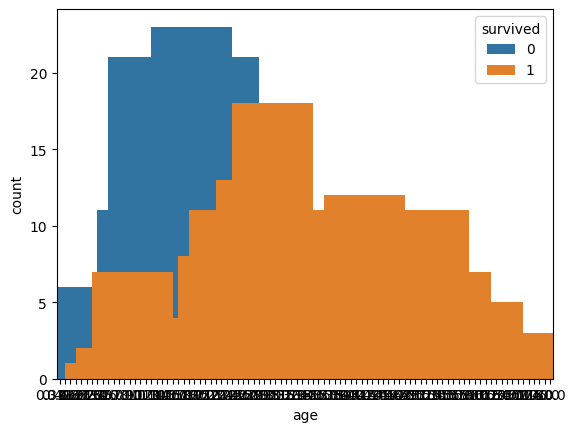

In [95]:
# sns.barplot(x=df_upd[df_upd['survived'] == 1]['age'],y=df_upd[df_upd['survived'] == 1]['age'].value_counts(),bins)
sns.countplot(df_upd, x="age", hue="survived", width=30)

## Модель на основе числовых признаков

### Удаление строк с пропусками

В качестве базовой модели имеет смысл построить модель с минимальными трудозатратами.

Из исходного датасета удалите все категориальные признаки, а также строки, содержащие пропуски.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами <code>test_size=0.2, random_state=11</code>. Используйте стратификацию по колонке <code>survived</code>.

Обучите модель <code>LogisticRegression()</code> с параметрами <code>random_state=11, max_iter=1000</code>, на тренировочных данных, оцените на тестовых.

Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию).

In [96]:
cat_columns = list(df_upd.select_dtypes(['object']).columns)
df_upd_1 = df_upd.drop(cat_columns, axis=1)

In [97]:
df_upd_1 = df_upd_1.dropna()

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
df_train, df_test = train_test_split(df_upd_1,
                                     test_size=0.2,
                                     random_state=11,
                                     stratify=df_upd_1['survived'])

In [100]:
X_train = df_train.drop('survived', axis=1)
y_train = df_train['survived']
X_test = df_test.drop('survived', axis=1)
y_test = df_test['survived']

In [101]:
clf = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

<code>f1_score</code>:

In [102]:
print(round(f1_score(y_test, y_pred), 3))

0.547


### Заполнение пропусков средним

Качество полученной модели оставляет желать лучшего. Имеет смысл попробовать заполнить пропуски. Из исходного набора данных удалите категориальные признаки, а пропуски заполните средним по столбцу. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [103]:
cat_columns = list(df_upd.select_dtypes(['object']).columns)
df_upd_1 = df_upd.drop(cat_columns, axis=1)

In [104]:
for e in list(df_upd_1.columns):
  df_upd_1[e].fillna(df_upd_1[e].mean(), inplace=True)

In [105]:
df_train, df_test = train_test_split(df_upd_1,
                                     test_size=0.2,
                                     random_state=11,
                                     stratify=df_upd_1['survived'])

In [106]:
X_train = df_train.drop('survived', axis=1)
y_train = df_train['survived']
X_test = df_test.drop('survived', axis=1)
y_test = df_test['survived']

In [107]:
clf = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [108]:
print(round(f1_score(y_test, y_pred), 3))

0.43


### Заполнение пропусков на основе обращения

Очевидно, что заполнение пропусков в колонке <code>age</code> средним — не самая разумная идея. Возможно, стоит выполнить эту процедуру как-то более интеллектуально, например, с оглядкой на обращение к человеку.

Можно заметить, что исходный датасет в столбце <code>name</code> содержит информацию о социальном статусе пассажира, а именно присутсвуют обращения <code>Mr., Mrs., Dr.</code> и т.д. На основе этой информации можно попробовать сделать предположение о возрасте пассажира.

Верните в рассмотрение колонку <code>name</code>. Создайте отдельную колонку <code>honorific</code> и поместите туда значения обращений.

Вычислите число уникальных обращений.

In [109]:
import re

In [110]:
cat_columns = list(df_upd.select_dtypes(['object']).columns)
df_upd_1 = df_upd.drop(cat_columns, axis=1)
df_upd_1['honorific'] = df_upd['name'].apply(lambda x: re.search(r'(\S+?)\.', x).group(1))

Вычислите число уникальных обращений.

In [111]:
len(df_upd_1['honorific'].unique())

14

Скорее всего имеет смысл сократить число обращений, добавив малочисленные группы к более многочисленным, так как принципиальной разницы между, например, <code>Don</code> и <code>Mr</code>, видимо, нет. Отметим, что <code>Master</code> — это прежнее обращение к ребенку, с этим обращением будем работать отдельно.




Выполните следующие замены:

<code>Mr</code> $\leftarrow$ <code>['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt']</code>

<code>Mrs</code> $\leftarrow$ <code> ['Dona', 'Countess']</code>

<code>Miss</code> $\leftarrow$ <code> ['Mlle', 'Ms']</code>

In [112]:
df_upd_1['honorific'].unique()

array(['Miss', 'Mrs', 'Mr', 'Master', 'Mlle', 'Rev', 'Ms', 'Col', 'Dona',
       'Dr', 'Countess', 'Major', 'Don', 'Capt'], dtype=object)

In [113]:
replacements = {
    'Rev': 'Mr',
    'Col': 'Mr',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Don': 'Mr',
    'Capt': 'Mr',
    'Dona': 'Mrs',
    'Countess': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Miss'
}

In [114]:
df_upd_1['honorific'] = df_upd_1['honorific'].apply(lambda x: replacements[x] if x in replacements else x)

In [115]:
df_upd_1['honorific'].unique()

array(['Miss', 'Mrs', 'Mr', 'Master'], dtype=object)

Вычислите долю строк со значением <code>Master</code> относительно числа всех мужчин.

In [116]:
male_qty = len(df_upd[df_upd['sex'] == 'male'])
master_qty = len(df_upd_1[df_upd_1['honorific'] == 'Master'])
print(round(master_qty / male_qty, 3))

0.072


Вычислите средний возраст категории <code>Miss</code>.

In [117]:
print(round(df_upd_1[df_upd_1['honorific'] == 'Miss']['age'].mean(), 3))

22.006


Заполните пропуски в колонке <code>age</code> средним, соответствующим среднему категории <code>honorific</code>.

Избавьтесь от нечисловых признаков. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [118]:
replacements = {}

for e in df_upd_1['honorific'].unique():
  replacements[e] = df_upd_1[df_upd_1['honorific'] == e]['age'].mean()

In [119]:
replacements

{'Miss': 22.00576540880503,
 'Mrs': 36.98425196850393,
 'Mr': 32.90043763676149,
 'Master': 5.128205128205129}

In [120]:
for i in range(len(df_upd_1)):
  if np.isnan(df_upd_1.loc[i, 'age']):
    df_upd_1.loc[i, 'age'] = replacements[df_upd_1.loc[i, 'honorific']]

df_upd_1

,pclass,survived,age,fare,fam_size,honorific
0,3,1,22.005765,7.7333,0,Miss
1,3,1,22.005765,7.7500,0,Miss
2,3,1,38.000000,7.2292,0,Mrs
3,3,0,22.000000,7.8958,0,Mr
4,3,0,16.000000,9.5000,0,Mr
...,...,...,...,...,...,...
976,3,1,22.005765,8.0500,0,Miss
977,3,1,19.000000,8.0500,0,Mr
978,2,0,34.000000,13.0000,0,Mr
979,3,0,22.000000,8.0500,0,Mr


In [121]:
cat_columns = list(df_upd_1.select_dtypes(['object']).columns)
df_upd_1 = df_upd_1.drop(cat_columns, axis=1)

In [122]:
df_train, df_test = train_test_split(df_upd_1,
                                     test_size=0.2,
                                     random_state=11,
                                     stratify=df_upd_1['survived'])

In [123]:
X_train = df_train.drop('survived', axis=1)
y_train = df_train['survived']
X_test = df_test.drop('survived', axis=1)
y_test = df_test['survived']

In [124]:
clf = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(round(f1_score(y_test, y_pred), 3))

0.439


## Модель с использование категориальных признаков

В исходном наборе данных заполните пропуски колонки <code>age</code> значениями на основе обращений (как в предыдущем пункте).

Не используйте признаки <code>name</code> и <code>honorific</code>. Они свою функцию выполнили.

Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>. Далее по знакомой схеме: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [205]:
df_upd['honorific'] = df_upd['name'].apply(lambda x: re.search(r'(\S+?)\.', x).group(1))

In [206]:
replacements = {
    'Rev': 'Mr',
    'Col': 'Mr',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Don': 'Mr',
    'Capt': 'Mr',
    'Dona': 'Mrs',
    'Countess': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Miss'
}

In [207]:
df_upd['honorific'] = df_upd['honorific'].apply(lambda x: replacements[x] if x in replacements else x)

In [128]:
replacements = {}

for e in df_upd['honorific'].unique():
  replacements[e] = df_upd[df_upd['honorific'] == e]['age'].mean()

In [129]:
for i in range(len(df_upd)):
  if np.isnan(df_upd.loc[i, 'age']):
    df_upd.loc[i, 'age'] = replacements[df_upd.loc[i, 'honorific']]

In [130]:
df_upd.drop(['name', 'honorific'], axis=1, inplace=True)

In [131]:
df_one_hot = pd.get_dummies(df_upd, drop_first=True)

In [133]:
df_train, df_test = train_test_split(df_one_hot,
                                     test_size=0.2,
                                     random_state=11,
                                     stratify=df_one_hot['survived'])

In [134]:
X_train = df_train.drop('survived', axis=1)
y_train = df_train['survived']
X_test = df_test.drop('survived', axis=1)
y_test = df_test['survived']

In [135]:
clf = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [136]:
print(round(f1_score(y_test, y_pred), 3))

0.658


# Задание 2

Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. Для успешного выполнения задания необходимо, чтобы ваш результат превысил пороговое значение, равное 0.74. В качестве метрики используется f1_score.

Отбираем наилучший метод:

In [158]:
df_upd_2 = df_upd.drop('name', axis=1)

In [159]:
df_upd_2 = df_upd_2.dropna()

In [160]:
df_upd_2['honorific'] = df_upd['name'].apply(lambda x: re.search(r'(\S+?)\.', x).group(1))

In [161]:
replacements = {
    'Rev': 'Mr',
    'Col': 'Mr',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Don': 'Mr',
    'Capt': 'Mr',
    'Dona': 'Mrs',
    'Countess': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Miss'
}

In [162]:
df_upd_2['honorific'] = df_upd_2['honorific'].apply(lambda x: replacements[x] if x in replacements else x)

In [163]:
df_upd_2

,pclass,survived,sex,age,fare,embarked,fam_size,honorific
2,3,1,female,38.0,7.2292,C,0,Mrs
3,3,0,male,22.0,7.8958,S,0,Mr
4,3,0,male,16.0,9.5000,S,0,Mr
5,3,1,male,29.0,7.7500,Q,0,Mr
7,1,0,male,25.0,26.0000,C,0,Mr
...,...,...,...,...,...,...,...,...
975,2,0,male,19.0,10.5000,S,0,Mr
977,3,1,male,19.0,8.0500,S,0,Mr
978,2,0,male,34.0,13.0000,S,0,Mr
979,3,0,male,22.0,8.0500,S,0,Mr


In [164]:
df_one_hot = pd.get_dummies(df_upd_2, drop_first=True)

In [165]:
df_train, df_test = train_test_split(df_one_hot,
                                     test_size=0.2,
                                     random_state=11,
                                     stratify=df_one_hot['survived'])

In [166]:
X_train = df_train.drop('survived', axis=1)
y_train = df_train['survived']
X_test = df_test.drop('survived', axis=1)
y_test = df_test['survived']

In [167]:
clf = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [168]:
print(round(f1_score(y_test, y_pred), 3))

0.756


Теперь обучим на всем датасете и предскажем для нового датасета

In [197]:
df_test = pd.read_csv('titanic_reserved.csv', sep=',')
df_test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
1,1,"Snyder, Mr. John Pillsbury",male,24.0000,1,0,21228,82.2667,B45,S,"Minneapolis, MN"
2,2,"Ashby, Mr. John",male,57.0000,0,0,244346,13.0000,NaN,S,"West Hoboken, NJ"
3,3,"Rosblom, Mr. Viktor Richard",male,18.0000,1,1,370129,20.2125,NaN,S,NaN
4,2,"Doling, Miss. Elsie",female,18.0000,0,1,231919,23.0000,NaN,S,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
323,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,"Philadelphia, PA"
324,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0000,0,0,111428,26.5500,NaN,S,"New York, NY"
325,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C,"New York, NY"
326,2,"Caldwell, Master. Alden Gates",male,0.8333,0,2,248738,29.0000,NaN,S,"Bangkok, Thailand / Roseville, IL"


In [198]:
df_test = df_test.drop('ticket', axis=1)

In [199]:
df_test = df_test.drop(['cabin', 'home.dest'], axis=1)

In [200]:
df_test['fam_size'] = df_test['sibsp'] + df_test['parch']
df_test = df_test.drop(['sibsp', 'parch'], axis=1)
df_test

,pclass,name,sex,age,fare,embarked,fam_size
0,3,"Sage, Mr. Frederick",male,NaN,69.5500,S,10
1,1,"Snyder, Mr. John Pillsbury",male,24.0000,82.2667,S,1
2,2,"Ashby, Mr. John",male,57.0000,13.0000,S,0
3,3,"Rosblom, Mr. Viktor Richard",male,18.0000,20.2125,S,2
4,2,"Doling, Miss. Elsie",female,18.0000,23.0000,S,1
...,...,...,...,...,...,...,...
323,1,"Brewe, Dr. Arthur Jackson",male,NaN,39.6000,C,0
324,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0000,26.5500,S,0
325,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,82.1708,C,1
326,2,"Caldwell, Master. Alden Gates",male,0.8333,29.0000,S,2


In [201]:
df_test['honorific'] = df_test['name'].apply(lambda x: re.search(r'(\S+?)\.', x).group(1))

In [202]:
df_test = df_test.drop('name', axis=1)

In [203]:
df_test['honorific'] = df_test['honorific'].apply(lambda x: replacements[x] if x in replacements else x)

In [208]:
replacements = {}

for e in df_test['honorific'].unique():
  stat_train = df_upd[df_upd['honorific'] == e]['age']
  stat_test = df_test[df_test['honorific'] == e]['age']
  replacements[e] = (stat_train.sum() + stat_test.sum()) / (len(stat_train) + len(stat_test))

In [209]:
for i in range(len(df_test)):
  if np.isnan(df_test.loc[i, 'age']):
    df_test.loc[i, 'age'] = replacements[df_test.loc[i, 'honorific']]

In [210]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [211]:
X_train = df_one_hot.drop('survived', axis=1)
y_train = df_one_hot['survived']

In [212]:
df_test = df_test.drop(['honorific_Lady', 'honorific_Master', 'honorific_Mme', 'honorific_Sir'], axis=1)

In [213]:
clf = LogisticRegression(random_state=11, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(df_test)

In [215]:
for i in range(len(y_pred)):
  if i == 0:
    print("[", end='')
  print(y_pred[i], end='')
  if i != len(y_pred) - 1:
    print(', ', end='')
  else:
    print(']')

[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
